In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [202]:
df=pd.read_csv('election.csv')
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


# Basics of dataset

In [203]:
df.shape

(21643, 28)

In [204]:
df.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

In [205]:
df.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [206]:
df.nunique()

TimeElapsed                   54
time                          54
territoryName                 21
totalMandates                 62
availableMandates             69
numParishes                   20
numParishesApproved          219
blankVotes                   329
blankVotesPercentage         146
nullVotes                    331
nullVotesPercentage          107
votersPercentage             282
subscribedVoters             335
totalVoters                  336
pre.blankVotes               323
pre.blankVotesPercentage     130
pre.nullVotes                329
pre.nullVotesPercentage       90
pre.votersPercentage         278
pre.subscribedVoters         331
pre.totalVoters              331
Party                         21
Mandates                      67
Percentage                  1363
validVotesPercentage        1387
Votes                       4029
Hondt                         41
FinalMandates                 17
dtype: int64

# Checking missing values

In [207]:
count=df.isnull().sum()
count

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

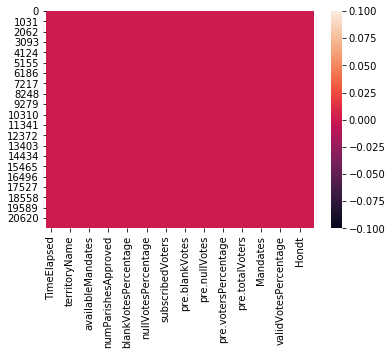

In [208]:
sns.heatmap(df.isnull())

# Converting time into usable numeric type

In [209]:
new = df["time"].str.split(' ',n=1,expand=True)

In [210]:
df['day']=new[0]
df['exacttime']=new[1]

In [211]:
df['day'].head()

0    2019-10-06
1    2019-10-06
2    2019-10-06
3    2019-10-06
4    2019-10-06
Name: day, dtype: object

In [212]:
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,day,exacttime
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106,2019-10-06,20:10:02
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77,2019-10-06,20:10:02
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19,2019-10-06,20:10:02
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5,2019-10-06,20:10:02
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12,2019-10-06,20:10:02


In [213]:
df['year'] = pd.DatetimeIndex(df['day']).year
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,day,exacttime,year
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106,2019-10-06,20:10:02,2019
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77,2019-10-06,20:10:02,2019
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19,2019-10-06,20:10:02,2019
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5,2019-10-06,20:10:02,2019
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12,2019-10-06,20:10:02,2019


In [214]:
df['month'] = pd.DatetimeIndex(df['day']).month
df['Day'] = pd.DatetimeIndex(df['day']).day
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,day,exacttime,year,month,Day
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106,2019-10-06,20:10:02,2019,10,6
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77,2019-10-06,20:10:02,2019,10,6
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19,2019-10-06,20:10:02,2019,10,6
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5,2019-10-06,20:10:02,2019,10,6
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12,2019-10-06,20:10:02,2019,10,6


In [215]:
newtime = df["exacttime"].str.split(':',expand=True)

In [216]:
df['hours']=newtime[0]
df['minutes']=newtime[1]
df['seconds']=newtime[2]

In [217]:
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,day,exacttime,year,month,Day,hours,minutes,seconds
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106,2019-10-06,20:10:02,2019,10,6,20,10,02
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77,2019-10-06,20:10:02,2019,10,6,20,10,02
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19,2019-10-06,20:10:02,2019,10,6,20,10,02
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5,2019-10-06,20:10:02,2019,10,6,20,10,02
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12,2019-10-06,20:10:02,2019,10,6,20,10,02


In [218]:
df.drop(columns=['time','day','exacttime'],inplace=True)

In [219]:
df.head()

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,year,month,Day,hours,minutes,seconds
0,0,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106,2019,10,6,20,10,02
1,0,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77,2019,10,6,20,10,02
2,0,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19,2019,10,6,20,10,02
3,0,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5,2019,10,6,20,10,02
4,0,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12,2019,10,6,20,10,02


In [220]:
df.dtypes

TimeElapsed                   int64
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates                 int64
year                        

# Visualization

In [221]:
df["hours"] = df["hours"].astype(str).astype(float)

In [222]:
df["minutes"] = df["minutes"].astype(str).astype(float)

In [223]:
df["seconds"] = df["seconds"].astype(str).astype(float)

In [224]:
df.dtypes

TimeElapsed                   int64
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates                 int64
year                        

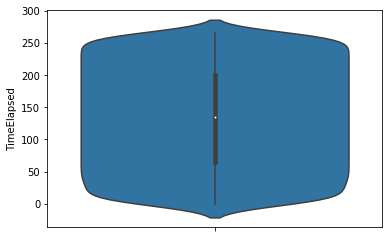

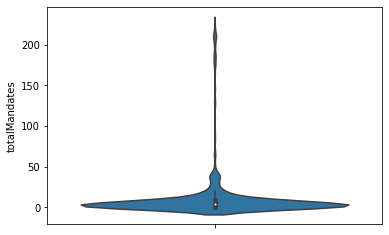

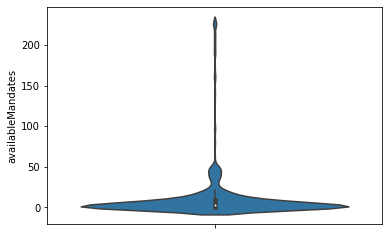

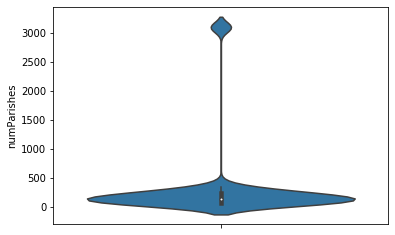

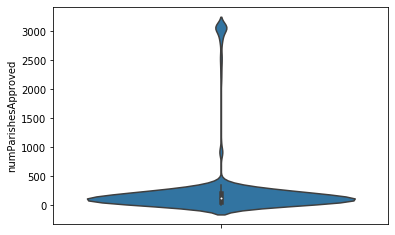

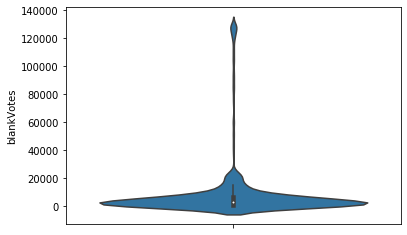

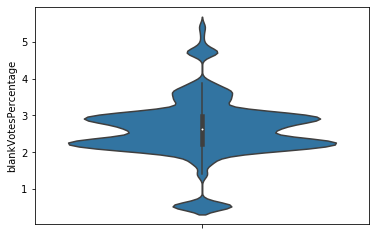

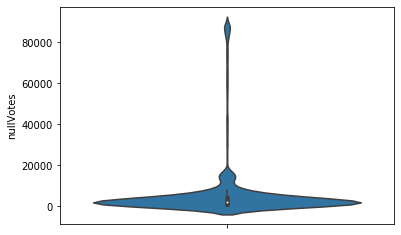

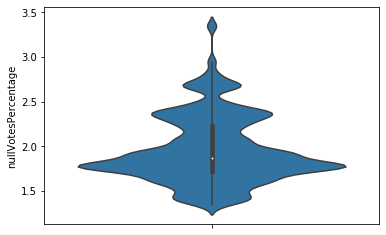

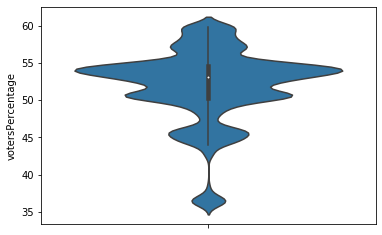

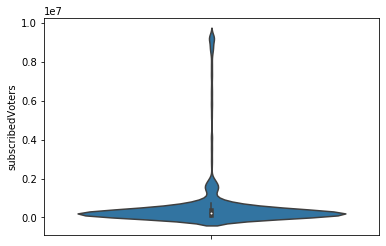

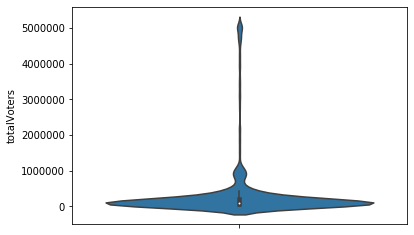

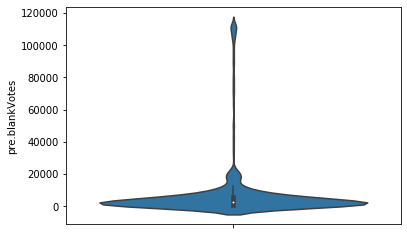

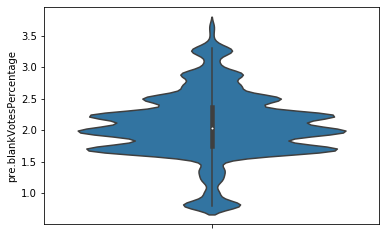

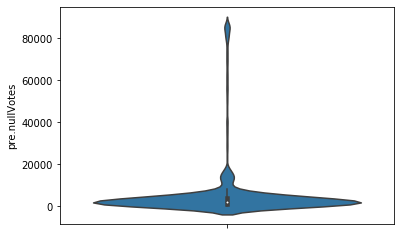

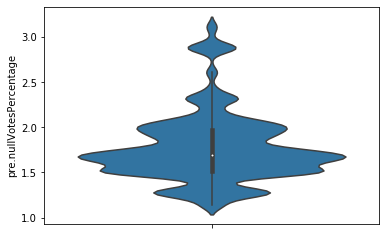

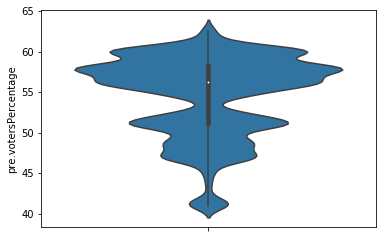

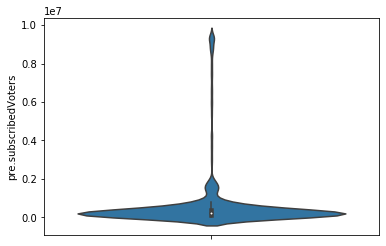

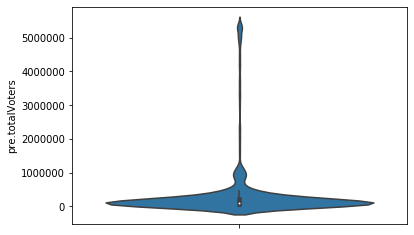

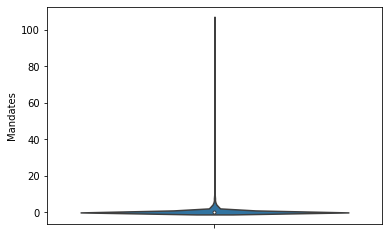

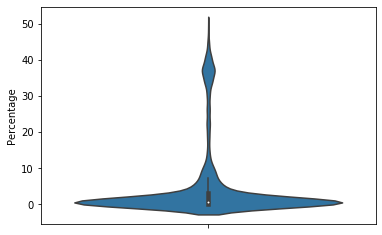

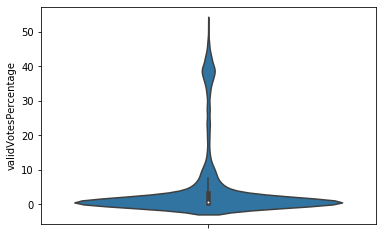

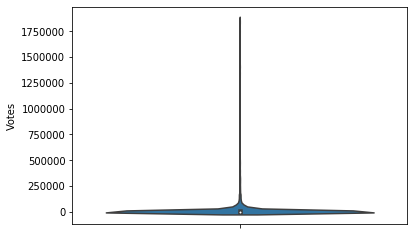

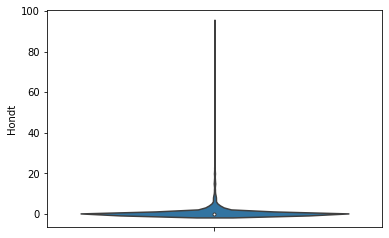

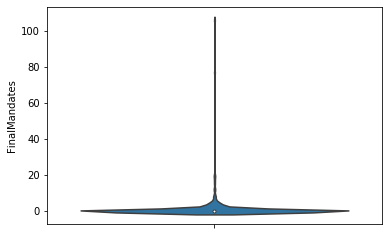

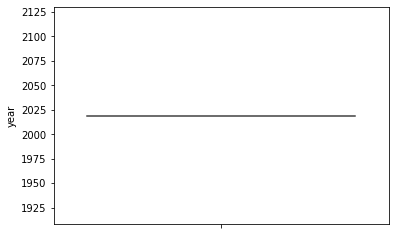

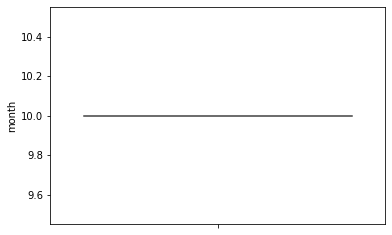

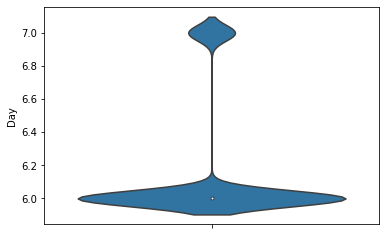

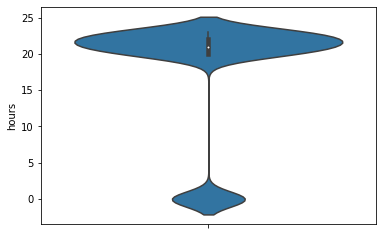

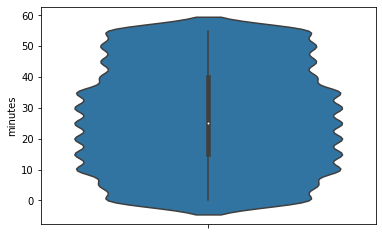

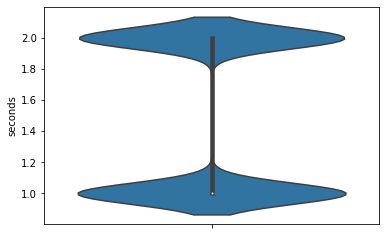

In [225]:
for i in ['TimeElapsed','totalMandates','availableMandates','numParishes','numParishesApproved','blankVotes','blankVotesPercentage','nullVotes','nullVotesPercentage','votersPercentage','subscribedVoters','totalVoters','pre.blankVotes','pre.blankVotesPercentage','pre.nullVotes','pre.nullVotesPercentage','pre.votersPercentage','pre.subscribedVoters','pre.totalVoters','Mandates','Percentage','validVotesPercentage','Votes','Hondt','FinalMandates','year','month','Day','hours','minutes','seconds']:
    sns.violinplot(y=i,data=df)
    plt.show()

In [226]:
df.nunique()

TimeElapsed                   54
territoryName                 21
totalMandates                 62
availableMandates             69
numParishes                   20
numParishesApproved          219
blankVotes                   329
blankVotesPercentage         146
nullVotes                    331
nullVotesPercentage          107
votersPercentage             282
subscribedVoters             335
totalVoters                  336
pre.blankVotes               323
pre.blankVotesPercentage     130
pre.nullVotes                329
pre.nullVotesPercentage       90
pre.votersPercentage         278
pre.subscribedVoters         331
pre.totalVoters              331
Party                         21
Mandates                      67
Percentage                  1363
validVotesPercentage        1387
Votes                       4029
Hondt                         41
FinalMandates                 17
year                           1
month                          1
Day                            2
hours     

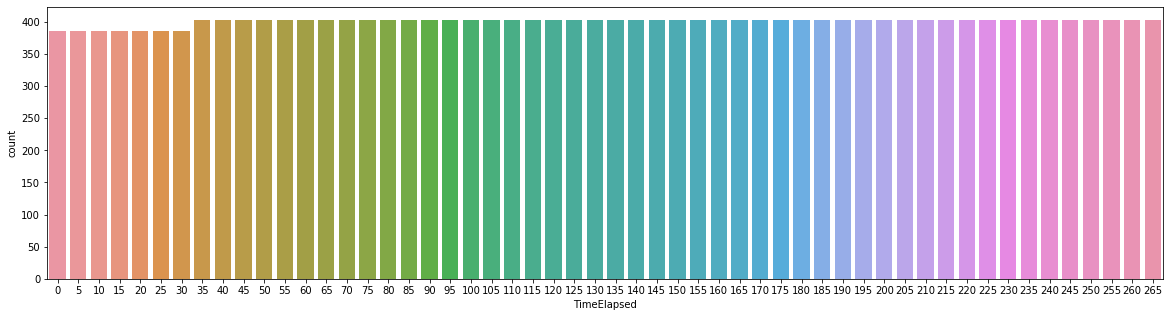

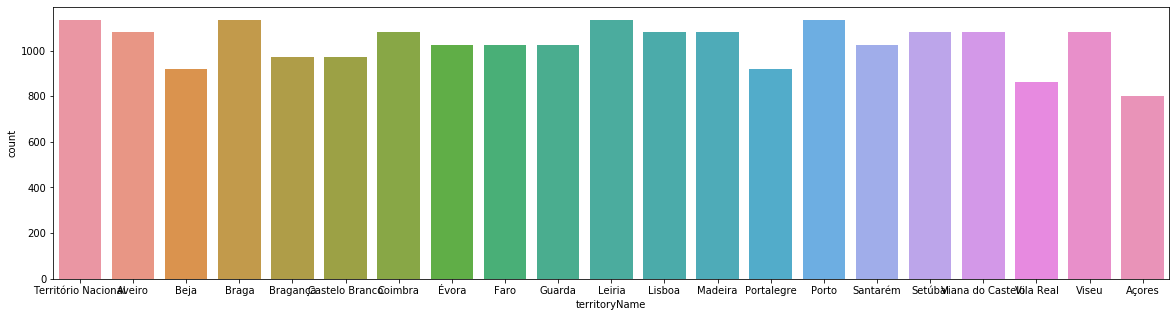

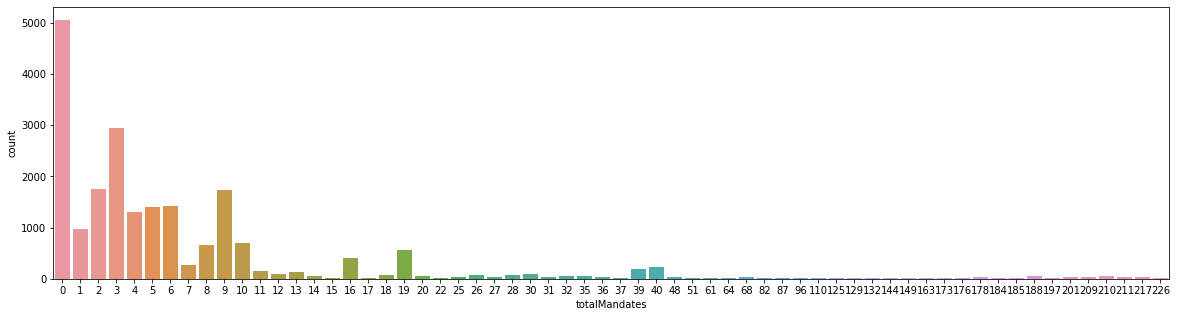

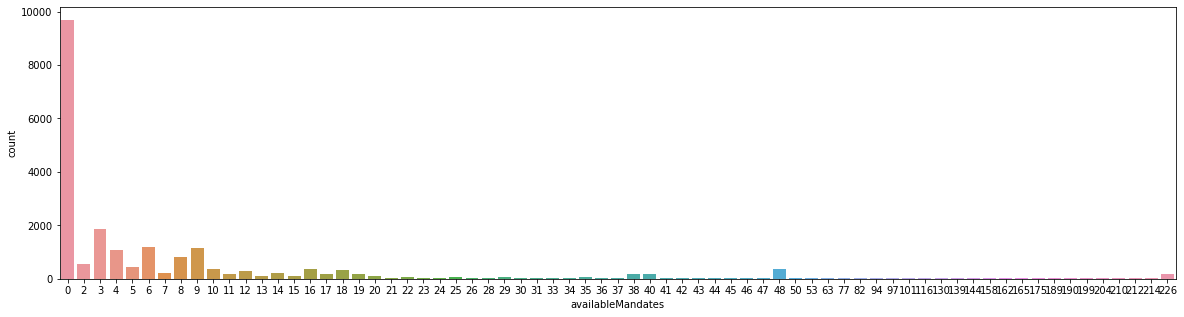

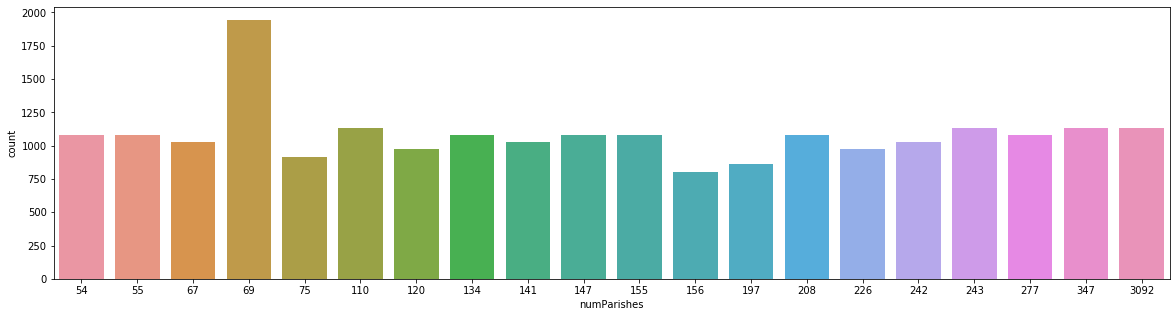

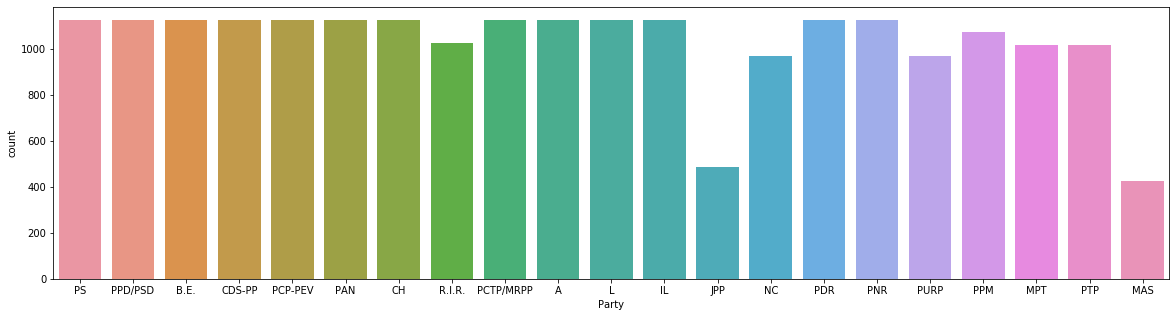

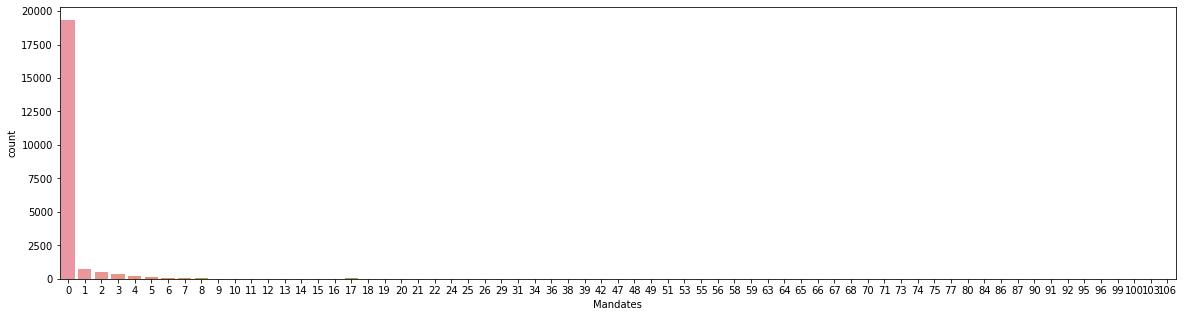

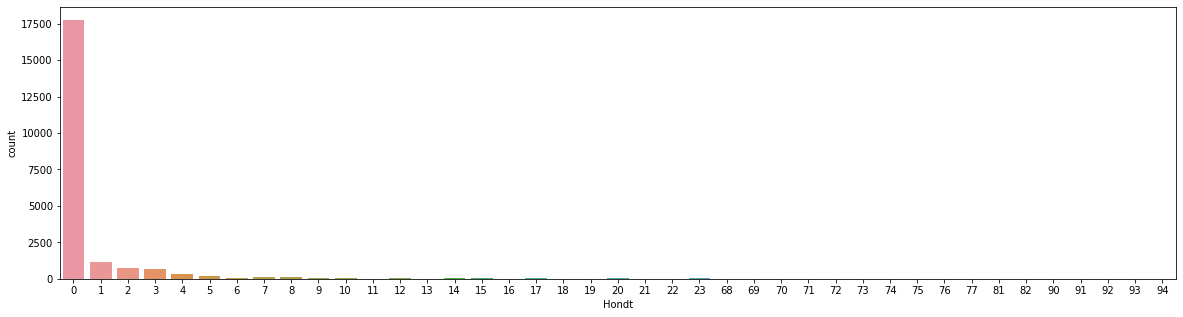

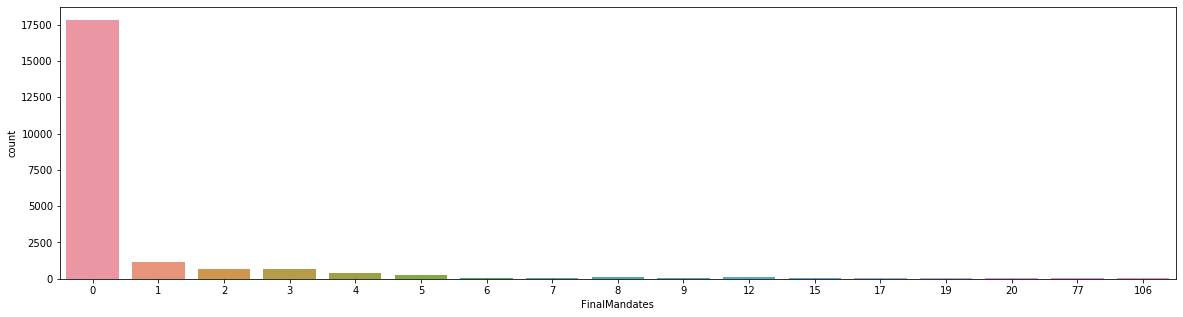

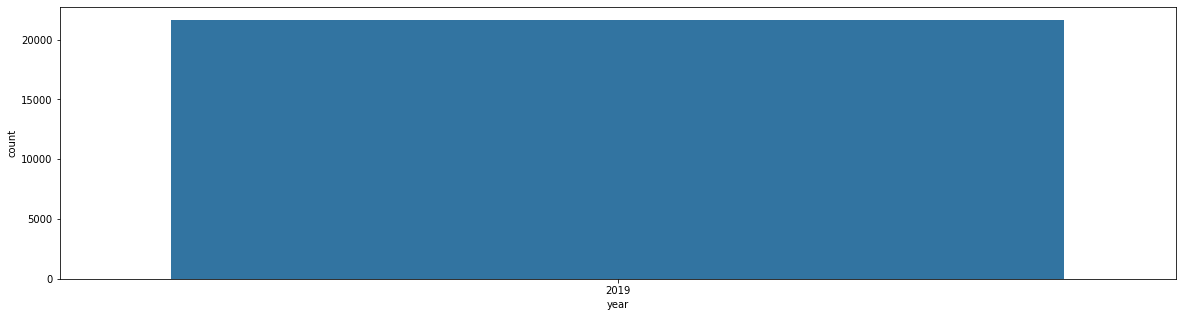

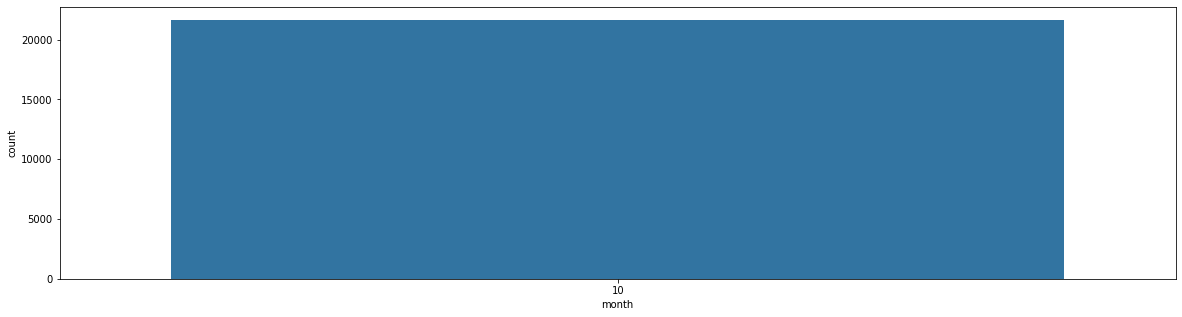

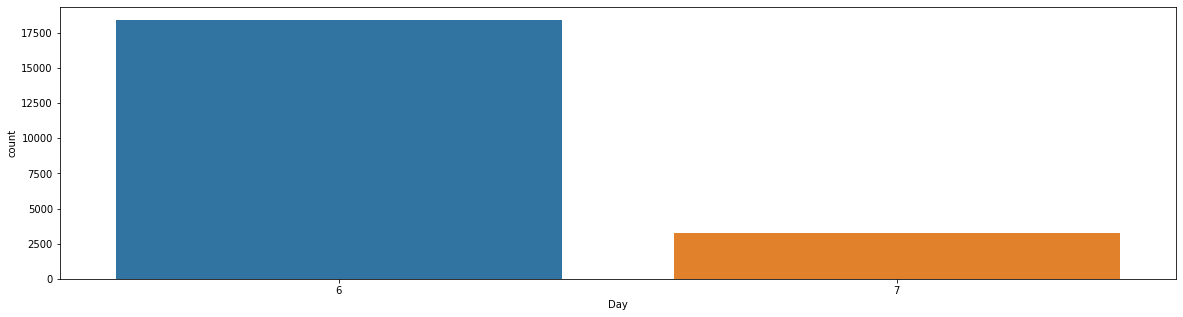

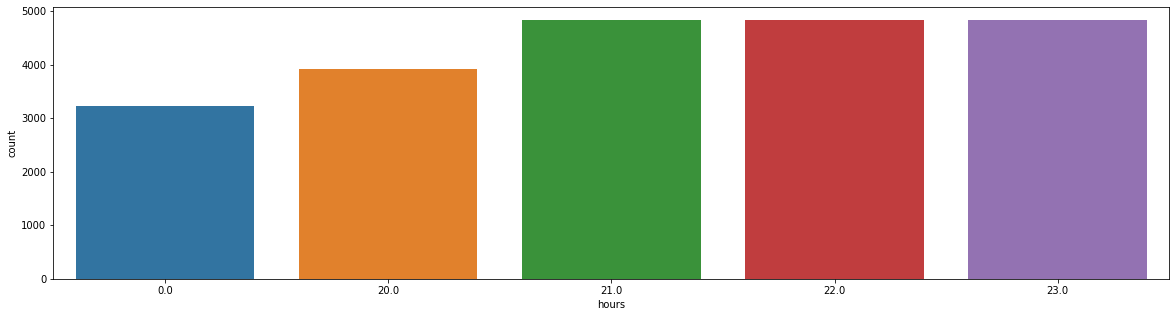

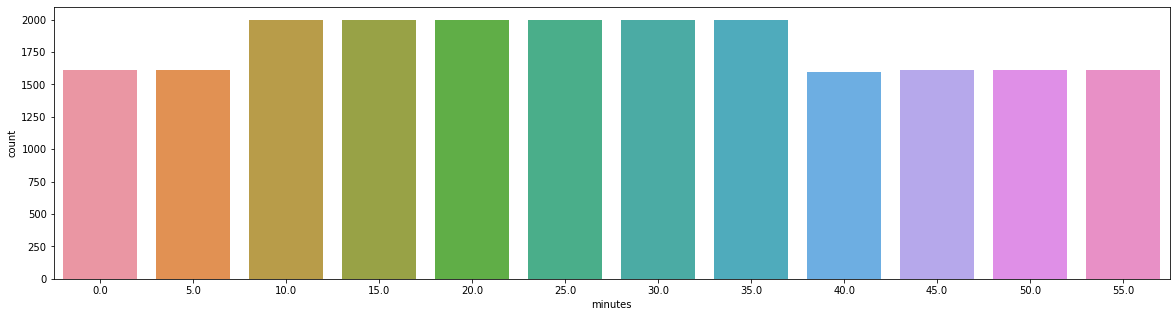

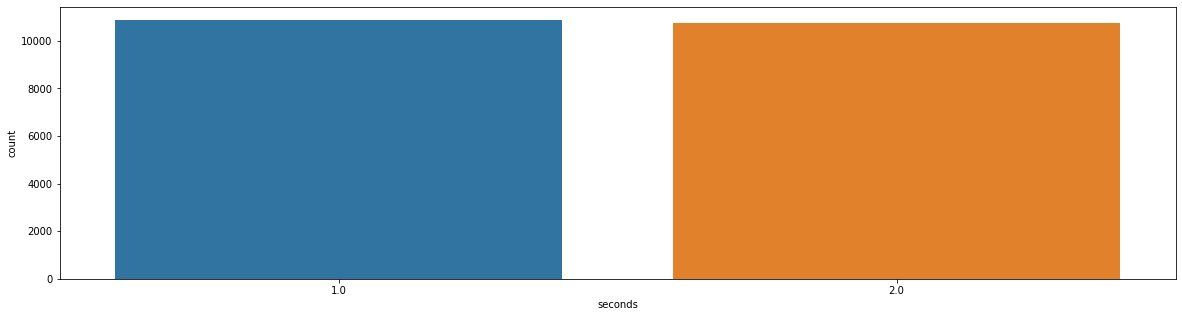

In [227]:
for i in ['TimeElapsed','territoryName','totalMandates','availableMandates','numParishes','Party','Mandates','Hondt','FinalMandates','year','month','Day','hours','minutes','seconds']:
    plt.figure(figsize=(20,5))
    sns.countplot(df[i])
    plt.show()

In [228]:
df.drop(columns=['year','month'],inplace=True)

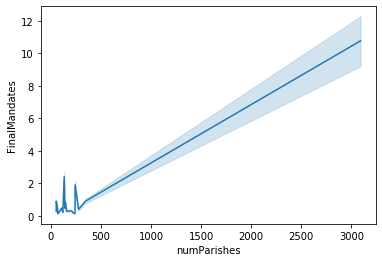

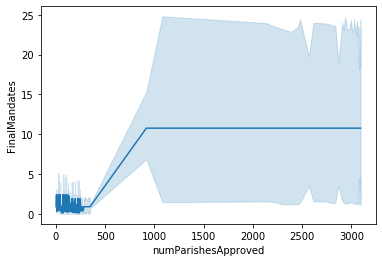

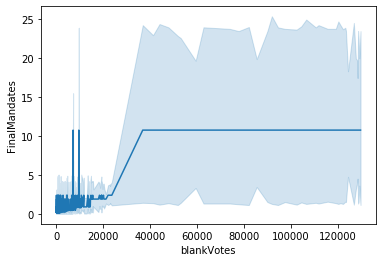

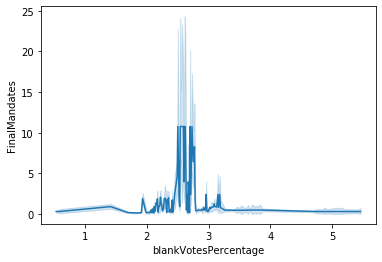

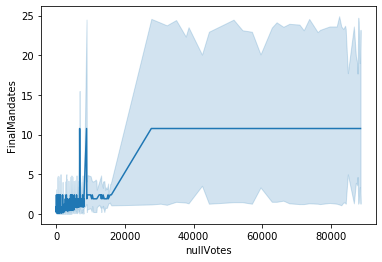

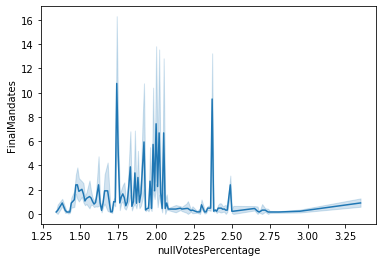

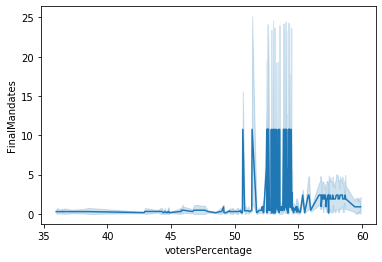

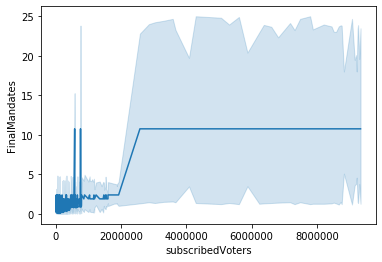

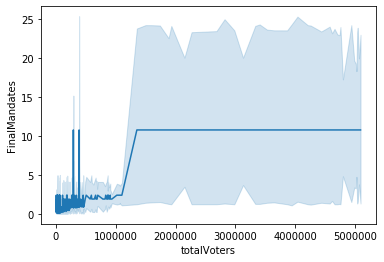

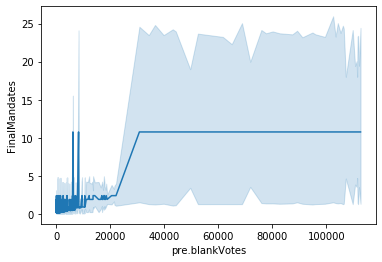

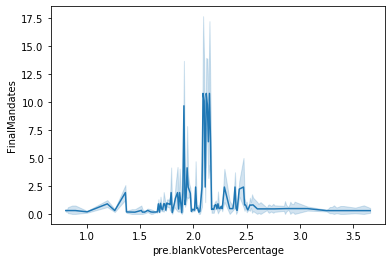

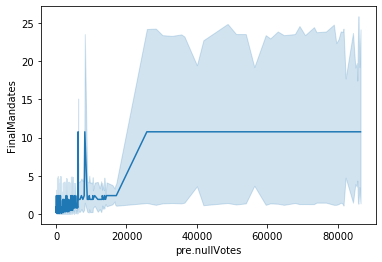

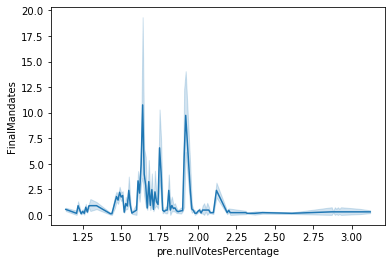

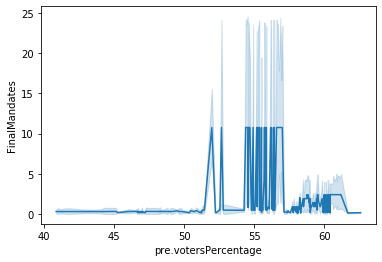

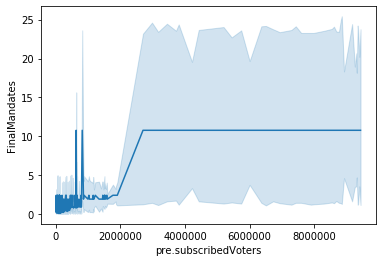

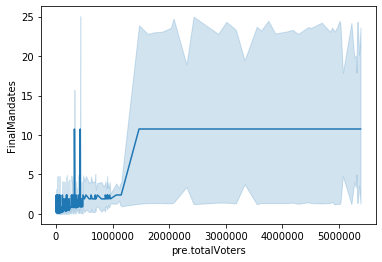

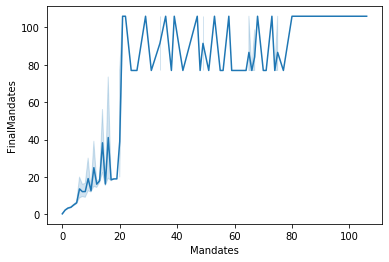

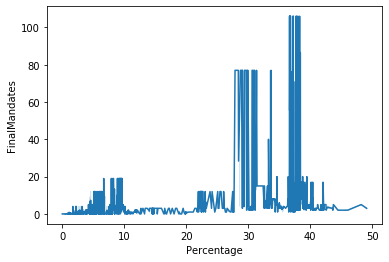

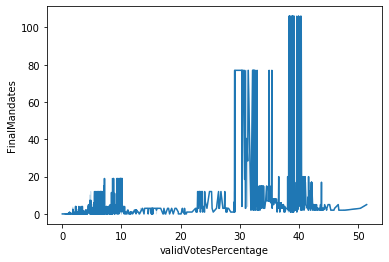

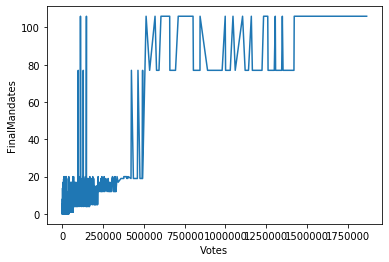

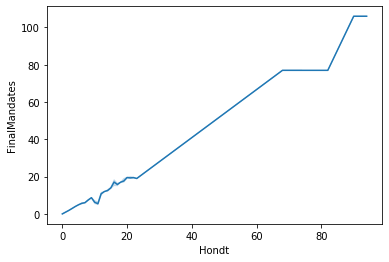

In [229]:
for i in ['numParishes','numParishesApproved','blankVotes','blankVotesPercentage','nullVotes','nullVotesPercentage','votersPercentage','subscribedVoters','totalVoters','pre.blankVotes','pre.blankVotesPercentage','pre.nullVotes','pre.nullVotesPercentage','pre.votersPercentage','pre.subscribedVoters','pre.totalVoters','Mandates','Percentage','validVotesPercentage','Votes','Hondt']:
    sns.lineplot(y=df['FinalMandates'],x=df[i],data=df)
    plt.show()

# Converting country into numeric dtype using label encoder

In [230]:
from sklearn.preprocessing import LabelEncoder

In [231]:
le=LabelEncoder()
df['territoryName']=le.fit_transform(df['territoryName'])
df['Party']=le.fit_transform(df['Party'])


In [232]:
df.head()

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,Day,hours,minutes,seconds
0,0,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,17,0,38.29,40.22,147993,94,106,6,20.0,10.0,2.0
1,0,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,15,0,33.28,34.95,128624,81,77,6,20.0,10.0,2.0
2,0,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,1,0,6.81,7.15,26307,16,19,6,20.0,10.0,2.0
3,0,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,2,0,4.90,5.14,18923,12,5,6,20.0,10.0,2.0
4,0,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,11,0,4.59,4.83,17757,11,12,6,20.0,10.0,2.0


# Correlation matrix

In [233]:
dco=df.corr()

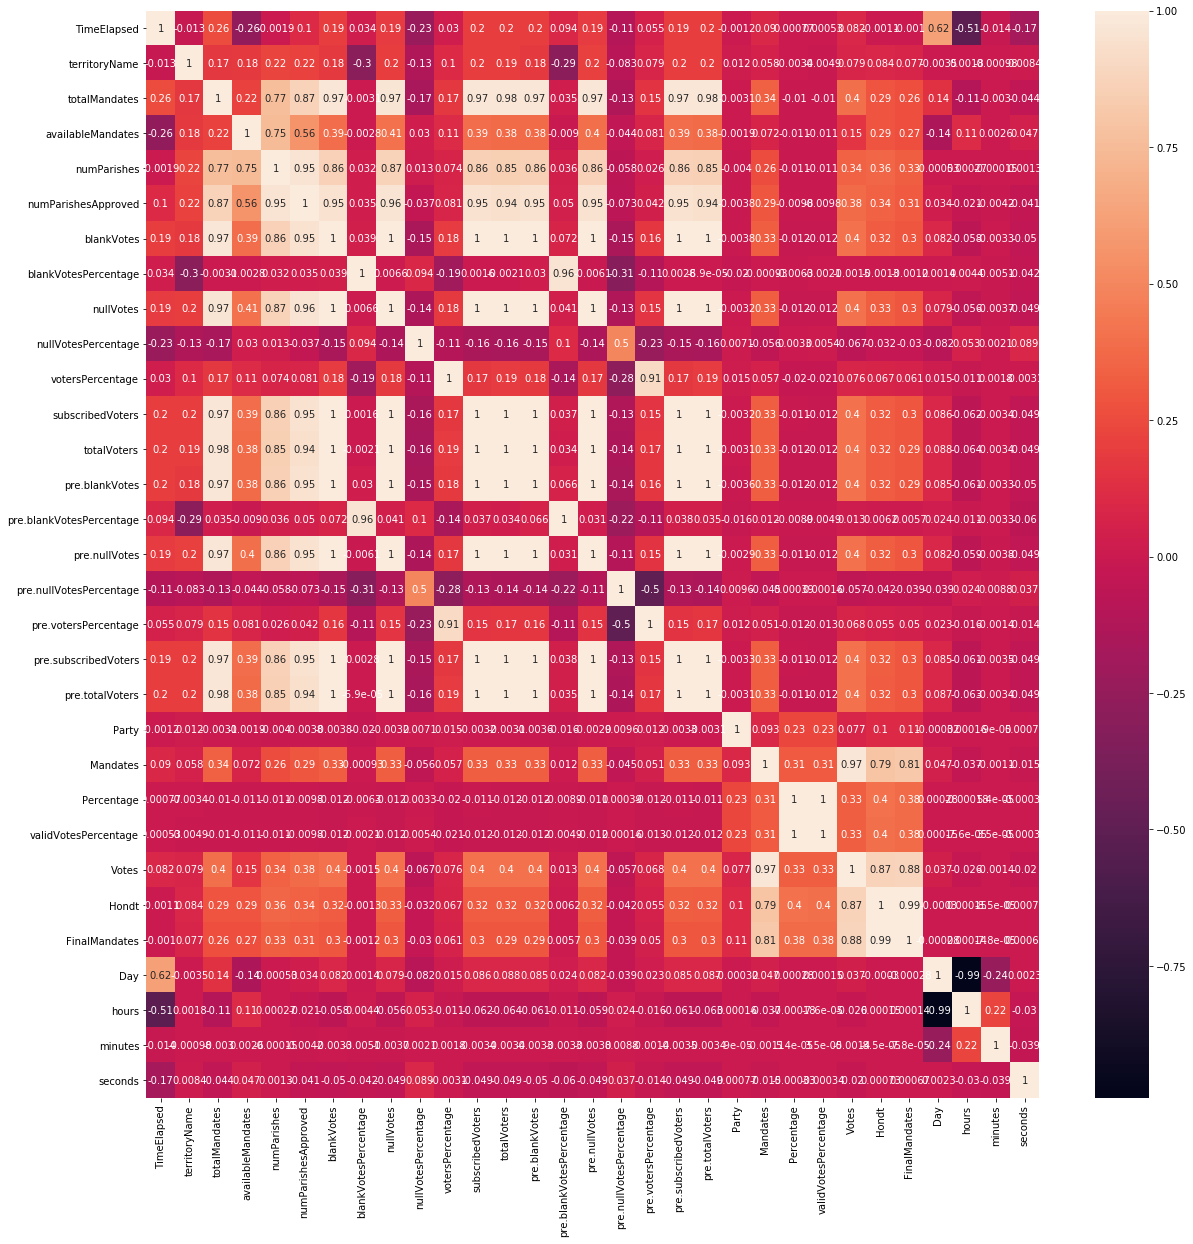

In [234]:
plt.figure(figsize=(20,20))
sns.heatmap(dco,annot=True)

# Statistics Summary

In [235]:
df.describe()

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,Day,hours,minutes,seconds
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000
mean,133.146052,10.116851,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,6.275367e+05,3.390741e+05,7608.001386,2.071985,5914.629950,1.777442,54.549372,6.378503e+05,3.594932e+05,10.096521,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138,6.148963,18.361410,26.955136,1.497251
std,77.651193,5.985225,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,1.525590e+06,8.290404e+05,18493.107257,0.518025,14236.038023,0.388798,4.964948,1.544418e+06,8.763729e+05,6.129654,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644,0.356060,7.747974,16.623537,0.500004
min,0.000000,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,5.767000e+03,2.833000e+03,32.000000,0.800000,40.000000,1.140000,40.870000,6.383000e+03,3.215000e+03,0.000000,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000
25%,65.000000,5.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,1.229870e+05,6.267100e+04,1130.000000,1.740000,1124.000000,1.520000,51.210000,1.289260e+05,6.964400e+04,4.000000,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000,6.000000,20.000000,15.000000,1.000000
50%,135.000000,10.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,2.289540e+05,1.060120e+05,2595.000000,2.030000,2141.000000,1.690000,56.260000,2.284970e+05,1.102730e+05,11.000000,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000,6.000000,21.000000,25.000000,1.000000
75%,200.000000,15.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,3.804890e+05,2.069180e+05,5929.000000,2.370000,3967.000000,1.970000,58.220000,3.933140e+05,2.276200e+05,15.000000,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000,6.000000,22.000000,40.000000,2.000000
max,265.000000,20.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,9.343084e+06,5.092424e+06,112666.000000,3.660000,86473.000000,3.120000,62.580000,9.439701e+06,5.380451e+06,20.000000,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000,7.000000,23.000000,55.000000,2.000000


# Checking for skewness and outliers distribution:-

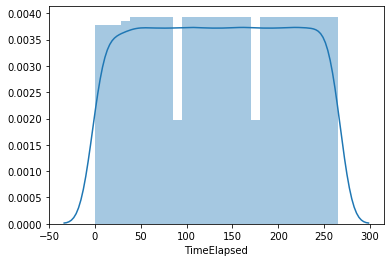

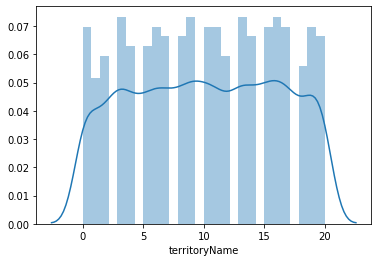

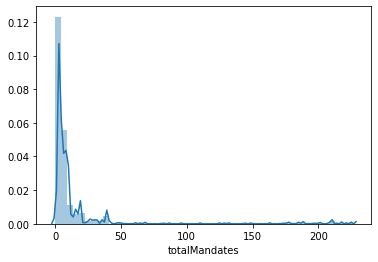

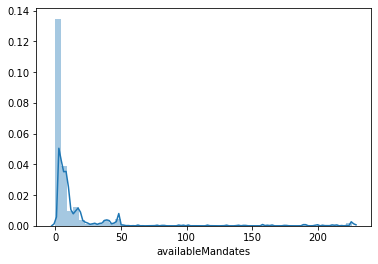

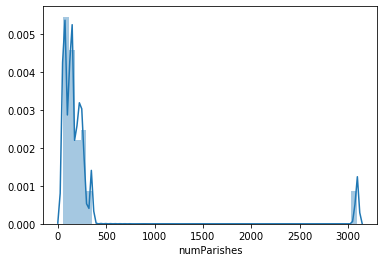

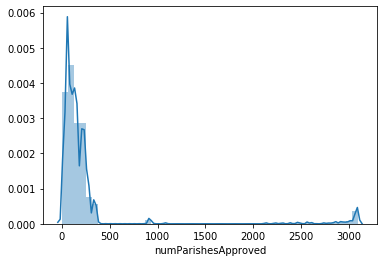

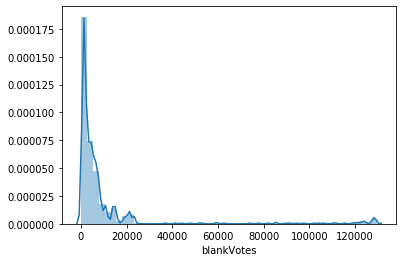

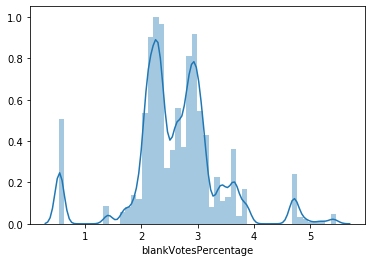

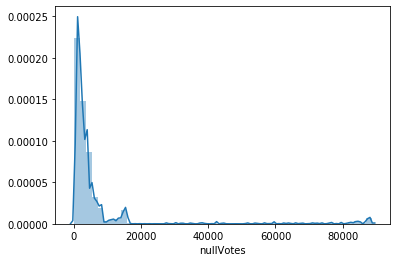

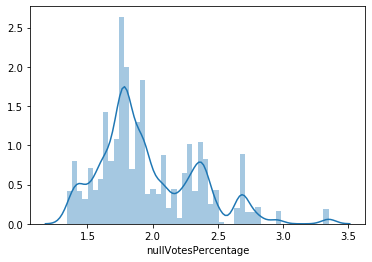

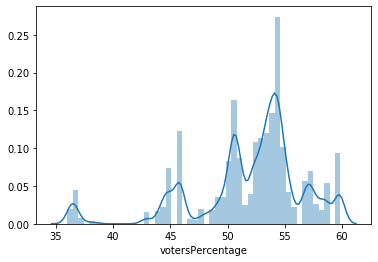

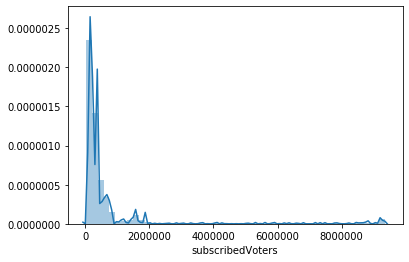

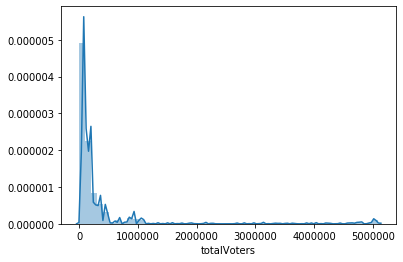

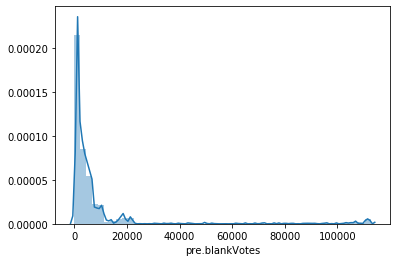

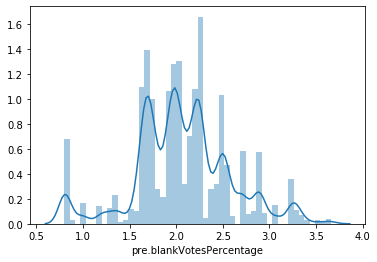

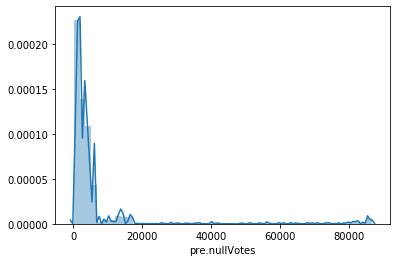

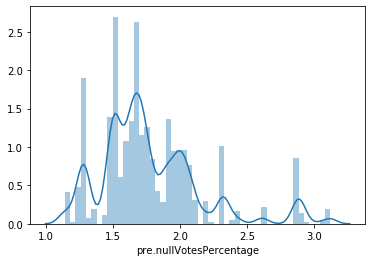

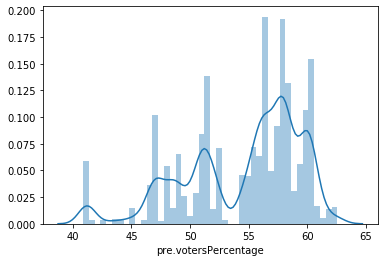

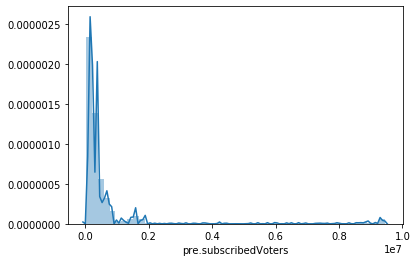

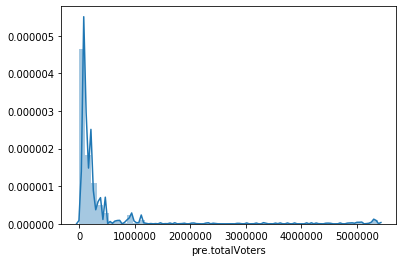

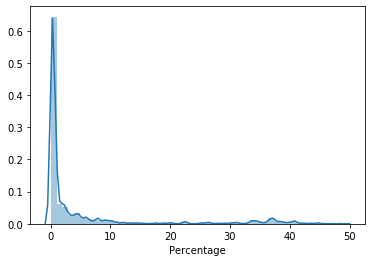

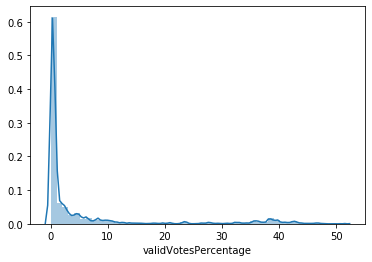

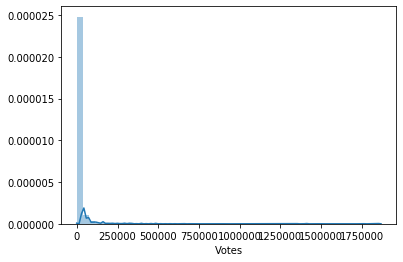

In [236]:
for i in ['TimeElapsed','territoryName','totalMandates','availableMandates','numParishes','numParishesApproved','blankVotes','blankVotesPercentage','nullVotes','nullVotesPercentage','votersPercentage','subscribedVoters','totalVoters','pre.blankVotes','pre.blankVotesPercentage','pre.nullVotes','pre.nullVotesPercentage','pre.votersPercentage','pre.subscribedVoters','pre.totalVoters','Percentage','validVotesPercentage','Votes']:
    sns.distplot(df[i])
    plt.show()
    

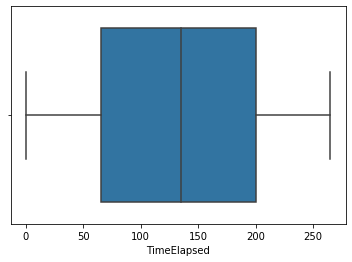

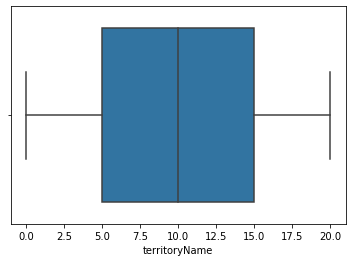

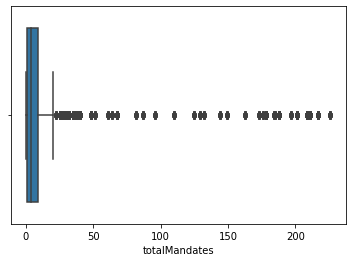

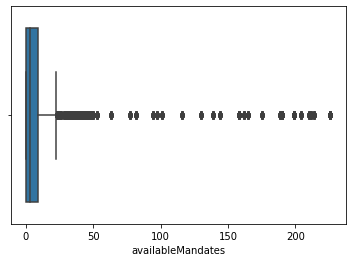

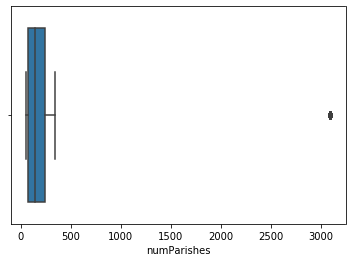

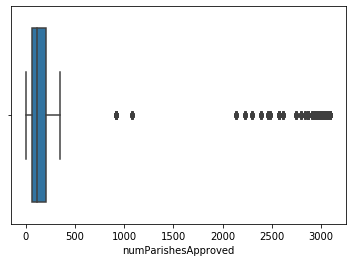

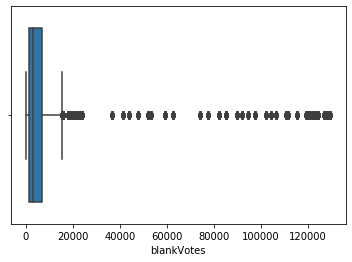

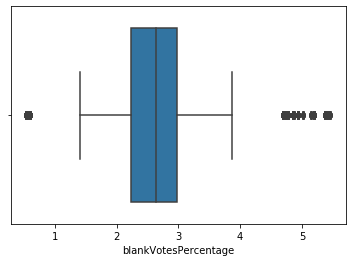

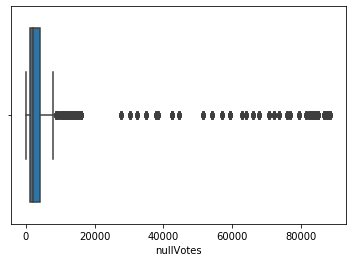

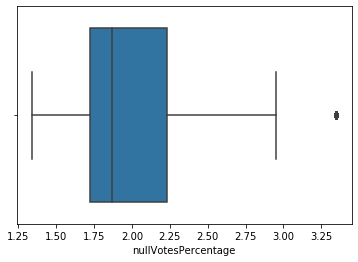

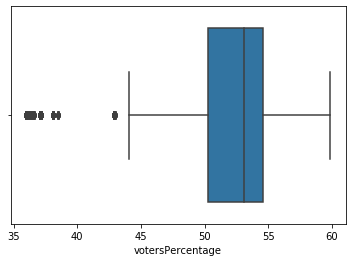

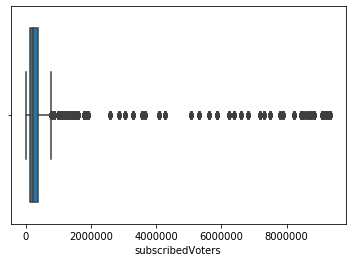

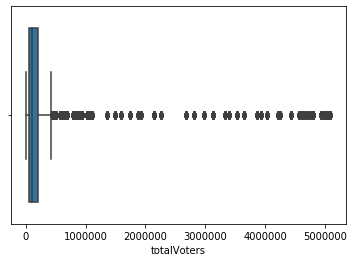

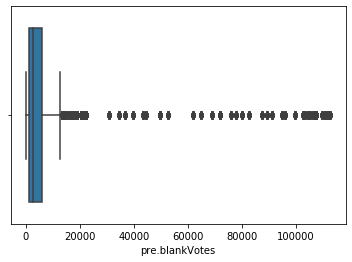

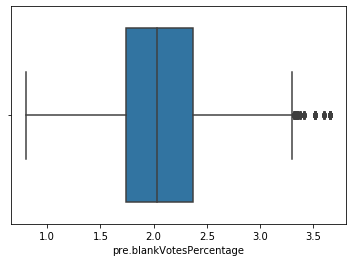

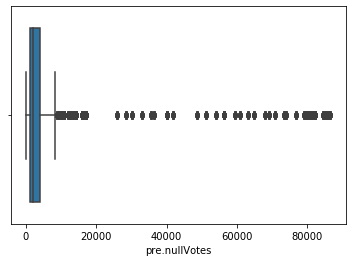

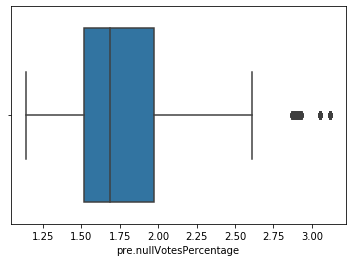

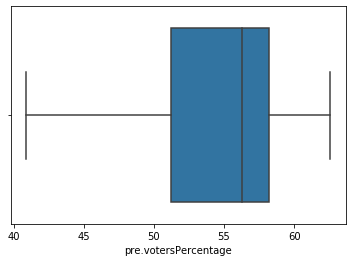

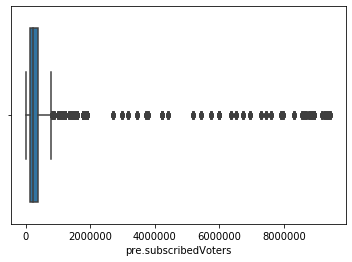

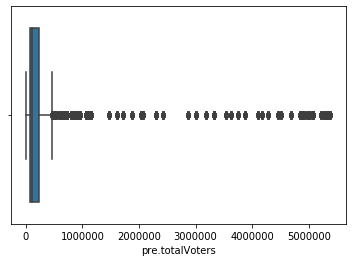

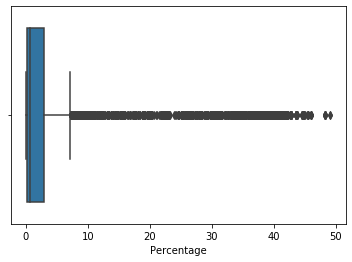

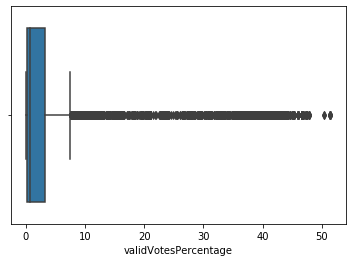

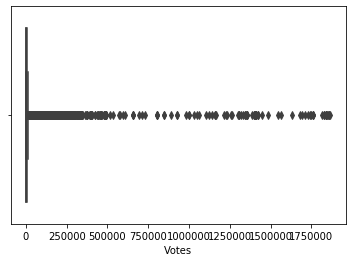

In [237]:
for i in ['TimeElapsed','territoryName','totalMandates','availableMandates','numParishes','numParishesApproved','blankVotes','blankVotesPercentage','nullVotes','nullVotesPercentage','votersPercentage','subscribedVoters','totalVoters','pre.blankVotes','pre.blankVotesPercentage','pre.nullVotes','pre.nullVotesPercentage','pre.votersPercentage','pre.subscribedVoters','pre.totalVoters','Percentage','validVotesPercentage','Votes']:
    sns.boxplot(df[i])
    plt.show()

# The skewed data and certain outliers need to be cleaned

In [238]:
from scipy.stats import zscore

In [239]:
df.dtypes

TimeElapsed                   int64
territoryName                 int32
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                         int32
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates                 int64
Day                         

In [240]:
z_score=abs(zscore(df))
print(df.shape)
dffinal=df.loc[(z_score<3).all(axis=1)]
print(dffinal.shape)

(21643, 31)
(18333, 31)


In [241]:
dffinal.skew()

TimeElapsed                -0.024110
territoryName               0.034073
totalMandates               2.542453
availableMandates           2.593527
numParishes                 0.585363
numParishesApproved         0.619329
blankVotes                  1.800122
blankVotesPercentage       -0.844508
nullVotes                   2.103352
nullVotesPercentage         0.564426
votersPercentage           -0.392023
subscribedVoters            2.407541
totalVoters                 2.468630
pre.blankVotes              2.034860
pre.blankVotesPercentage   -0.410446
pre.nullVotes               2.340000
pre.nullVotesPercentage     1.033803
pre.votersPercentage       -0.514215
pre.subscribedVoters        2.370988
pre.totalVoters             2.468950
Party                       0.009657
Mandates                    7.177093
Percentage                  3.373567
validVotesPercentage        3.383145
Votes                       7.310058
Hondt                       7.012845
FinalMandates               6.746120
D

In [242]:
for col in dffinal.columns:
    if dffinal.skew().loc[col]>0.55:
        dffinal[col]=np.log1p(dffinal[col])

In [243]:
dffinal.skew()

TimeElapsed                -0.024110
territoryName               0.034073
totalMandates               0.020702
availableMandates           0.503375
numParishes                -0.138265
numParishesApproved        -1.099103
blankVotes                 -0.592756
blankVotesPercentage       -0.844508
nullVotes                  -0.880145
nullVotesPercentage         0.329675
votersPercentage           -0.392023
subscribedVoters           -0.772107
totalVoters                -0.647681
pre.blankVotes             -0.642916
pre.blankVotesPercentage   -0.410446
pre.nullVotes              -0.937998
pre.nullVotesPercentage     0.628444
pre.votersPercentage       -0.514215
pre.subscribedVoters       -0.802802
pre.totalVoters            -0.670218
Party                       0.009657
Mandates                    4.479200
Percentage                  1.565493
validVotesPercentage        1.550088
Votes                       0.268973
Hondt                       3.488567
FinalMandates               3.368168
D

# Now,scaling of data has to be done

In [244]:
dffinal.isnull().sum()

TimeElapsed                 0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
Day                         0
hours                       0
minutes                     0
seconds                     0
dtype: int64

In [245]:
xn=dffinal.drop(columns=['FinalMandates'])
yn=dffinal['FinalMandates']

In [246]:
from sklearn.preprocessing import StandardScaler

In [247]:
scale=StandardScaler()
xn=scale.fit_transform(xn)


In [248]:
xd=pd.DataFrame(xn)

In [249]:
xd.skew()

0    -0.024110
1     0.034073
2     0.020702
3     0.503375
4    -0.138265
5    -1.099103
6    -0.592756
7    -0.844508
8    -0.880145
9     0.329675
10   -0.392023
11   -0.772107
12   -0.647681
13   -0.642916
14   -0.410446
15   -0.937998
16    0.628444
17   -0.514215
18   -0.802802
19   -0.670218
20    0.009657
21    4.479200
22    1.565493
23    1.550088
24    0.268973
25    3.488567
26    1.949782
27   -1.881976
28    0.074425
29    0.032626
dtype: float64

In [250]:
xd.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

In [251]:
yn.isnull().sum()

0

# Splitting the dataset at 20% into train and test dataset with output variable yn

In [252]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xd,yn,test_size=.20,random_state=42)

In [253]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals import joblib

In [254]:
def maxr2_score(regr,xd,yn):
    max_r_score=0
    for r_state in range(42,100):
        xtrain,xtest,ytrain,ytest=train_test_split(xd,yn,test_size=.20,random_state=r_state)
        regr.fit(xtrain,ytrain)
        ypred=regr.predict(xtest)
        r2_scr=r2_score(ytest,ypred)
        print('r2 score corresponding to ',r_state,'is',r2_scr)
        if r2_scr>max_r_score:
            max_r_score= r2_scr
            finalrstate=r_state
    print('max r2 score corresponding to',finalrstate,'is',max_r_score)
    return finalrstate

# Using GridSearchCV to hypertune

In [255]:
lr = LinearRegression()
svr = SVR()
knr=KNeighborsRegressor()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()
ada=AdaBoostRegressor()
dtr=DecisionTreeRegressor()

parameters={'C': [10, 1.0,0.1],'kernel':['linear','poly', 'rbf']}
clf=GridSearchCV(svr,parameters)
clf.fit(xd,yn)
print('best SVR parameters is :',clf.best_params_)
print('\n')
parameters={'n_neighbors':range(1,30)}
clf=GridSearchCV(knr,parameters)
clf.fit(xd,yn)
print('best KNR parameters is :',clf.best_params_)
print('\n')
parameters={'n_estimators':[50,100,150,200,250,300]}
clf=GridSearchCV(rfr,parameters,cv=5)
clf.fit(xd,yn)
print('best RFR parameters is :',clf.best_params_)
print('\n')
parameters={'learning_rate':[0.01,0.1,1],'n_estimators':[50,100,150,200,250,300]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(xd,yn)
print('best GBR parameters is :',clf.best_params_)
print('\n')
parameters={'learning_rate':[0.01,0.1,1],'n_estimators':[50,100,150,200,250,300],'base_estimator':[lr,dtr]}
clf=GridSearchCV(ada,parameters,cv=5)
clf.fit(xd,yn)
print('best ADA parameters is :',clf.best_params_)
print('\n')
alphavalue={'alpha':[1,0.1,0.001]}
list=[Lasso(),Ridge(),ElasticNet()]
for i in list:
    grid=GridSearchCV(estimator=i,param_grid=alphavalue)
    grid.fit(xd,yn)
    print(grid.best_score_)
    print(grid.best_estimator_.alpha)
    print(grid.best_params_)
    print('\n')

best SVR parameters is : {'C': 10, 'kernel': 'linear'}


best KNR parameters is : {'n_neighbors': 1}


best RFR parameters is : {'n_estimators': 150}


best GBR parameters is : {'learning_rate': 0.1, 'n_estimators': 100}


best ADA parameters is : {'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best'), 'learning_rate': 1, 'n_estimators': 250}


0.9779740154773826
0.001
{'alpha': 0.001}


0.9770014345030509
0.001
{'alpha': 0.001}


0.9782407400343249
0.001
{'alpha': 0.001}




In [256]:
lr = LinearRegression()
r_state=maxr2_score(lr,xd,yn)
print('\n')
svr = SVR(C=10,kernel='linear')
r_state=maxr2_score(svr,xd,yn)
print('\n')
knr=KNeighborsRegressor(n_neighbors= 1)
r_state=maxr2_score(knr,xd,yn)
print('\n')
rfr=RandomForestRegressor(n_estimators=150)
r_state=maxr2_score(rfr,xd,yn)
print('\n')
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=100)
r_state=maxr2_score(gbr,xd,yn)
print('\n')
ada=AdaBoostRegressor(learning_rate=1,n_estimators=250,base_estimator=dtr)
r_state=maxr2_score(ada,xd,yn)
print('\n')
ela=ElasticNet(alpha=0.001)
r_state=maxr2_score(ela,xd,yn)
print('\n')

r2 score corresponding to  42 is 0.9772274713057755
r2 score corresponding to  43 is 0.9804499422887092
r2 score corresponding to  44 is 0.9775354098679354
r2 score corresponding to  45 is 0.9755939263494017
r2 score corresponding to  46 is 0.9807368842079545
r2 score corresponding to  47 is 0.9839888445818733
r2 score corresponding to  48 is 0.9766461611141928
r2 score corresponding to  49 is 0.9817895187182945
r2 score corresponding to  50 is 0.9826210576383049
r2 score corresponding to  51 is 0.9757865837122526
r2 score corresponding to  52 is 0.9770695818299999
r2 score corresponding to  53 is 0.9776916868862157
r2 score corresponding to  54 is 0.973689822265048
r2 score corresponding to  55 is 0.9742884740778107
r2 score corresponding to  56 is 0.9740625916640034
r2 score corresponding to  57 is 0.9735943894122104
r2 score corresponding to  58 is 0.977827863813195
r2 score corresponding to  59 is 0.9787049484116831
r2 score corresponding to  60 is 0.9818783972488957
r2 score corre

r2 score corresponding to  82 is 0.989595368688142
r2 score corresponding to  83 is 0.990310824882861
r2 score corresponding to  84 is 0.9877888297234968
r2 score corresponding to  85 is 0.986402602835481
r2 score corresponding to  86 is 0.9854135109367934
r2 score corresponding to  87 is 0.9887215349091398
r2 score corresponding to  88 is 0.9845313779681328
r2 score corresponding to  89 is 0.9922033898132294
r2 score corresponding to  90 is 0.9774195761199748
r2 score corresponding to  91 is 0.987203355960957
r2 score corresponding to  92 is 0.9872138935248311
r2 score corresponding to  93 is 0.9850511898018851
r2 score corresponding to  94 is 0.9887345687072562
r2 score corresponding to  95 is 0.983069511197336
r2 score corresponding to  96 is 0.9911110429733355
r2 score corresponding to  97 is 0.9878951445224137
r2 score corresponding to  98 is 0.9866954035561489
r2 score corresponding to  99 is 0.9919676396031069
max r2 score corresponding to 59 is 0.9939244513970296


r2 score cor

r2 score corresponding to  65 is 1.0
r2 score corresponding to  66 is 0.9998730125802526
r2 score corresponding to  67 is 1.0
r2 score corresponding to  68 is 1.0
r2 score corresponding to  69 is 1.0
r2 score corresponding to  70 is 1.0
r2 score corresponding to  71 is 1.0
r2 score corresponding to  72 is 1.0
r2 score corresponding to  73 is 1.0
r2 score corresponding to  74 is 0.9992860616648396
r2 score corresponding to  75 is 1.0
r2 score corresponding to  76 is 1.0
r2 score corresponding to  77 is 0.9998915166514657
r2 score corresponding to  78 is 1.0
r2 score corresponding to  79 is 1.0
r2 score corresponding to  80 is 1.0
r2 score corresponding to  81 is 0.9996306831044833
r2 score corresponding to  82 is 1.0
r2 score corresponding to  83 is 1.0
r2 score corresponding to  84 is 0.9992262046493406
r2 score corresponding to  85 is 0.9988736442552925
r2 score corresponding to  86 is 0.9996015929816603
r2 score corresponding to  87 is 1.0
r2 score corresponding to  88 is 1.0
r2 scor

In [257]:
models=[]
models.append(('LinearRegression',lr))
models.append(('SVR',svr))
models.append(('kNeighborsRegressor',knr))
models.append(('RFR',rfr))
models.append(('GBR',gbr))
models.append(('ADAREG',ada))
models.append(('Elastic',ela))


In [258]:
from sklearn.model_selection import cross_val_score

In [259]:
Model=[]
score=[]
cvs=[]
for name,model in models:
    print('****,name,****')
    print('\n')
    Model.append(name)
    model.fit(xtrain,ytrain)
    print(model)
    pre=model.predict(xtest)
    print('\n')
    RS=r2_score(ytest,pre)
    print('r2 score',RS)
    score.append(RS*100)
    print('\n')
    sc=cross_val_score(model,xd,yn,cv=5,scoring='r2').mean()
    print('Cross val score',sc)
    cvs.append(sc*100)
    print('\n')

****,name,****


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


r2 score 0.9772274713057755


Cross val score -6.167371896894905e+22


****,name,****


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


r2 score 0.9693088041104135


Cross val score 0.9691225717558932


****,name,****


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')


r2 score 0.987352874018513


Cross val score 0.973067817430081


****,name,****


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      mi

In [260]:
result=pd.DataFrame({'Model':Model,'r2_score': score,'Cross val score': cvs})
result

,Model,r2_score,Cross val score
0,LinearRegression,97.722747,-6.167372e+24
1,SVR,96.930880,9.691226e+01
2,kNeighborsRegressor,98.735287,9.730678e+01
3,RFR,99.923513,9.741769e+01
4,GBR,98.908397,9.813982e+01
5,ADAREG,99.888738,9.862105e+01
6,Elastic,97.688108,9.782407e+01


# After having tried all the above models , ADA BOOST REG is working best
Also, random state corresponding to max r2 score in ADAREG is 43

In [261]:
xtrain,xtest,ytrain,ytest=train_test_split(xd,yn,test_size=.20,random_state=43)
ada=AdaBoostRegressor(learning_rate=1,n_estimators=250,base_estimator=dtr)
ada.fit(xtrain,ytrain)
ypred=ada.predict(xtest)

# Final model is as follows

In [262]:
print('RMSE is',np.sqrt(mean_squared_error(ytest,ypred)))
print('r2_score is',r2_score(ytest,ypred))

RMSE is 0.011446428665052218
r2_score is 0.9993193352669378


# Saving the model

In [263]:
joblib.dump(ada,'Model_election.obj')

['Model_election.obj']

In [264]:
model=joblib.load('Model_election.obj')

In [265]:
model.predict(xtest)

array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       1.38629436])